In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import keras
from PIL import Image

/home/hao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_csv = pd.read_csv('/home/hao/DATAS/Salt/train.csv')

In [3]:
train_csv[:40]

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...
5,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...
6,9842f69f8d,NaN
7,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...
8,50d3073821,1 2121 9293 909
9,28f865caaa,NaN


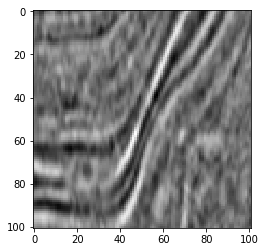

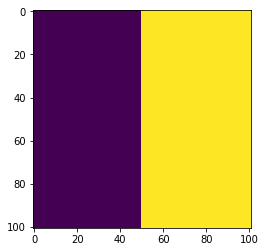

In [4]:
im = Image.open('/home/hao/DATAS/Salt/train/images/a266a2a9df.png')
im_array = np.asarray(im)
plt.imshow(im_array)
plt.show()
im_mask = Image.open('/home/hao/DATAS/Salt/train/masks/a266a2a9df.png')
im_mask_array = np.asarray(im_mask)
plt.imshow(im_mask_array)
plt.show()


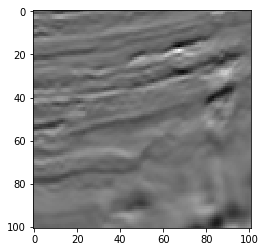

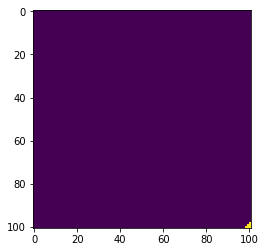

In [5]:
im = Image.open('/home/hao/DATAS/Salt/train/images/46dd77ede5.png')
im_array = np.asarray(im)
plt.imshow(im_array)
plt.show()
im_mask = Image.open('/home/hao/DATAS/Salt/train/masks/46dd77ede5.png')
im_mask_array = np.asarray(im_mask)
plt.imshow(im_mask_array)
plt.show()

In [6]:
path = os.listdir('/home/hao/DATAS/Salt/train/images')
train_image = []
train_mask = []
for i in range(len(path)):
    path_now = path[i]
    a = Image.open('/home/hao/DATAS/Salt/train/images/'+str(path_now))
    a = np.asarray(a)
    train_image.append(a)
    b = Image.open('/home/hao/DATAS/Salt/train/masks/'+str(path_now))
    b = np.asarray(b)
    train_mask.append(b)
train_image = np.asarray(train_image)
train_mask = np.asarray(train_mask)

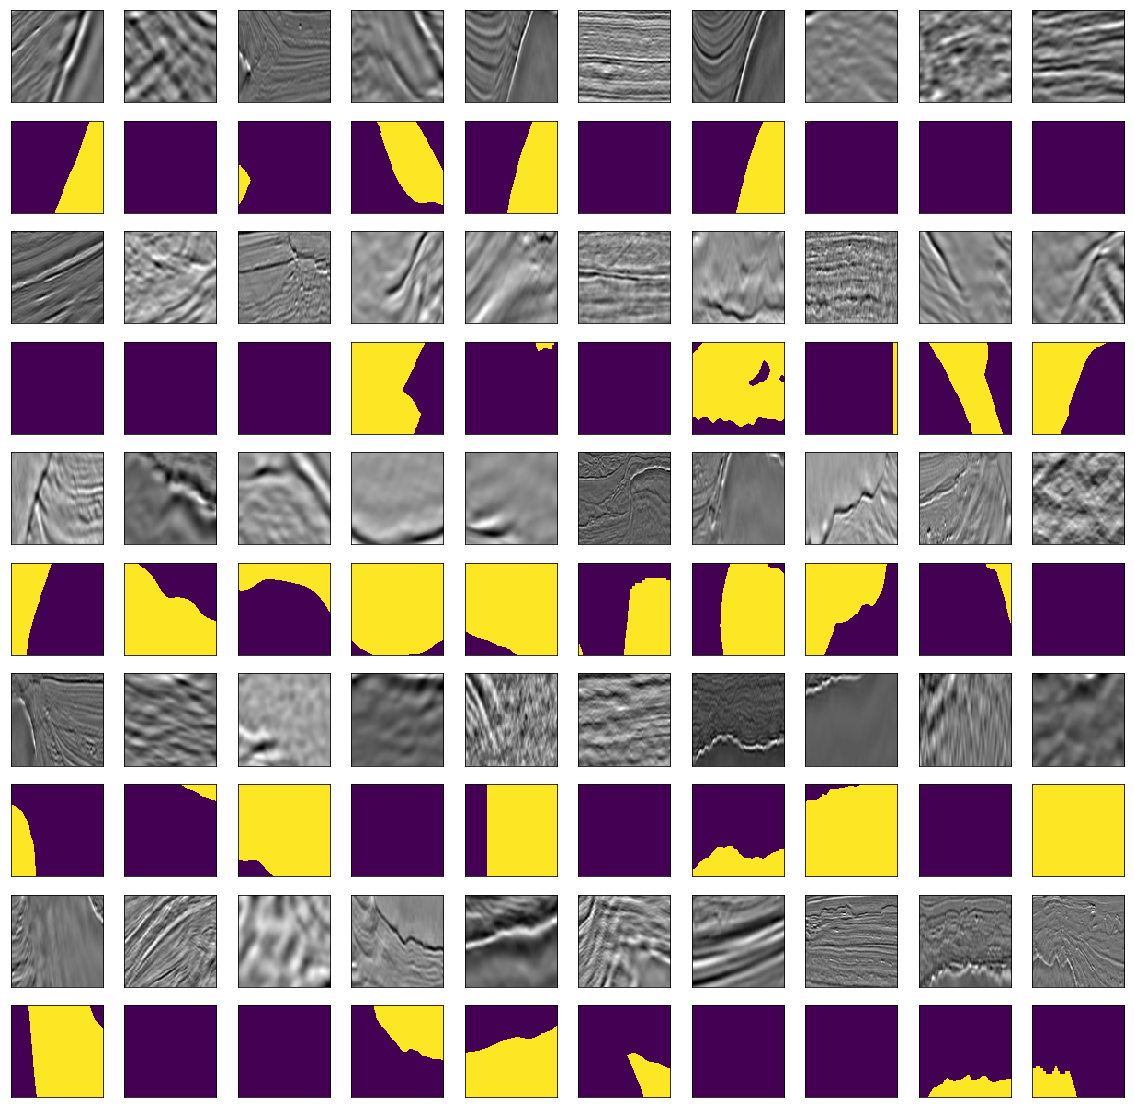

In [7]:
n = 10  # n*n plot
plt.figure(figsize=(20, 20))
for i in range(n//2):
    for j in range(n):
        ax = plt.subplot(n,n,2*i*n + j+1)
        plt.imshow(train_image[i*n+j])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(n,n,2*i*n+n+j+1)
        plt.imshow(train_mask[i*n+j])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
plt.show()

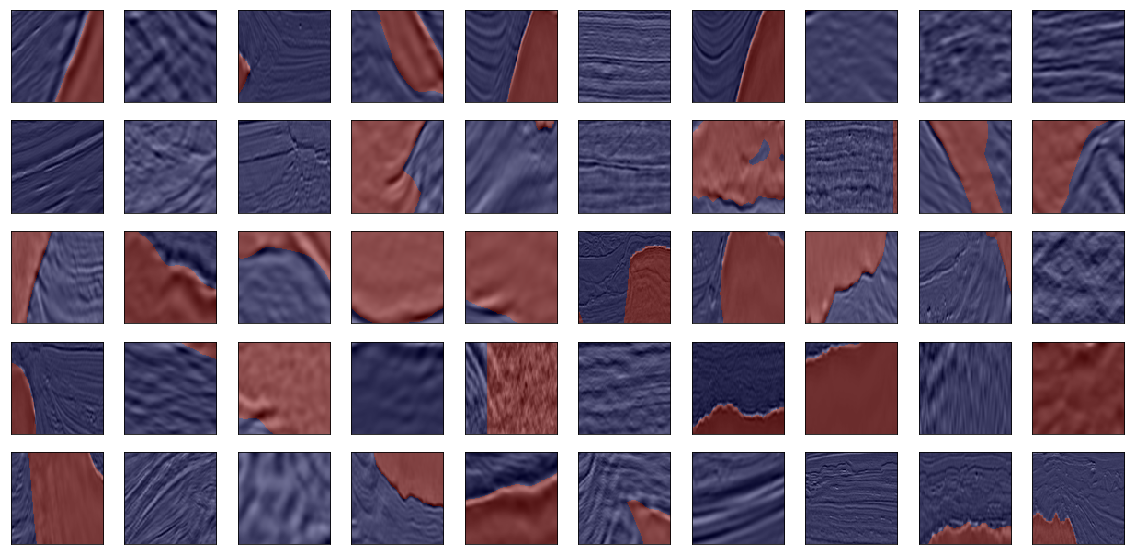

In [8]:

n = 10  # n*n plot
plt.figure(figsize=(20, 20))
for i in range(n//2):
    for j in range(n):
        ax = plt.subplot(n,n,i*n + j+1)
        plt.imshow(train_image[i*n+j])
        plt.imshow(train_mask[i*n+j],cmap='seismic', alpha=0.5)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
plt.show()

In [9]:
train_mask = train_mask/np.max(train_mask)
train_image = train_image/np.max(train_image)

In [10]:
from time import time
import pandas as pd
import numpy as np
from PIL import Image
from keras import optimizers
import keras.layers.advanced_activations
import scipy
import random
import matplotlib.pyplot as plt  
from scipy.stats import norm  
import keras
from keras.models import Sequential
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, concatenate, MaxPooling2D, AveragePooling2D
from keras.layers import UpSampling2D, Reshape, Lambda, Flatten, Activation,Concatenate
from keras.models import Model  
from keras.optimizers import SGD, Adadelta, Adagrad,Adam
from keras import backend as K  
from keras import objectives  
from keras.utils.vis_utils import plot_model  
from keras.utils import np_utils, generic_utils
import sys 
import tensorflow as tf
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets,cluster
from sklearn.utils import check_random_state
from sklearn import metrics


In [11]:
print(train_mask.shape)
print(train_image.shape)

(4000, 101, 101)
(4000, 101, 101, 3)


In [12]:
train_mask_96 = train_mask[:,5:,5:]
train_mask_96 = np.reshape(train_mask_96,[4000,96,96,1])
train_image_96 = train_image[:,5:,5:,:]

In [13]:
print(train_mask_96.shape)
print(train_image_96.shape)

(4000, 96, 96, 1)
(4000, 96, 96, 3)


In [22]:
batch_size =20
latent_dim = 256
nb_epoch = 50
intermediate_dim =256
original_dim = 96*96
LRelu = 'relu'

#USE = 'autoencoder'
#USE = 'vae'
#encoder:

input_img = Input(shape=(96,96,3))

conv_1 = Conv2D(20, (3, 3), padding='same',kernel_initializer='normal',dilation_rate=2)(input_img)
conv_1 = Activation('relu')(conv_1)
conv_1 = BatchNormalization()(conv_1)
maxpool_1 = MaxPooling2D((2, 2),padding='same')(conv_1)

conv_2 = Conv2D(20, (3, 3), padding='same',kernel_initializer='normal',dilation_rate=2)(maxpool_1)
conv_2 = Activation('relu')(conv_2)
conv_2 = BatchNormalization()(conv_2)
maxpool_2 = MaxPooling2D((2, 2),  padding='same')(conv_2)

conv_3 = Conv2D(20, (3, 3),padding='same',kernel_initializer='normal',dilation_rate=1)(maxpool_2)
conv_3 = Activation(LRelu)(conv_3)
conv_3 = BatchNormalization()(conv_3)
maxpool_3 = MaxPooling2D((2, 2),  padding='same')(conv_3)

conv_4 = Conv2D(20, (3, 3),padding='same',kernel_initializer='normal',dilation_rate=1)(maxpool_3)
conv_4 = Activation(LRelu)(conv_4)
conv_4 = BatchNormalization()(conv_4)
maxpool_4 = MaxPooling2D((2, 2),  padding='same')(conv_4)

conv_5 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(maxpool_4)
maxpool_5 = MaxPooling2D((2, 2),  padding='same')(conv_5)


#x = Conv2D(5, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(x)
#x = MaxPooling2D((2, 2),  padding='same')(x)

visual = Flatten()(maxpool_5)
h_1 = Dense(intermediate_dim, activation='relu')(visual)#relu?
encoded = Dense(latent_dim, activation='tanh')(h_1)# relu?


h_3 = Dense(intermediate_dim,activation=LRelu)(encoded)#for AE

h_4 = Dense(20*3*3,activation=LRelu)(h_3)
h_5 = Reshape((3,3,20))(h_4)


conv_6 = Conv2D(20, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(h_5)
upsample_6 = UpSampling2D((2, 2))(conv_6)

upsample_7 = Concatenate()([upsample_6,conv_5])
conv_7 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_6)
upsample_7 = UpSampling2D((2, 2))(conv_7)

upsample_7 = Concatenate()([upsample_7,conv_4])
conv_8 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_7)
upsample_8 = UpSampling2D((2, 2))(conv_8)

upsample_8 = Concatenate()([upsample_8,conv_3])
conv_9 = Conv2D(10, (3, 3), activation='relu', padding='same',kernel_initializer='normal')(upsample_8)
upsample_9 = UpSampling2D((2, 2))(conv_9)

#upsample_9 = Concatenate()([upsample_9,conv_2])
conv_10 = Conv2D(5,  (3, 3), activation='relu',padding='same',kernel_initializer='normal')(upsample_9)
upsample_10 = UpSampling2D((2, 2))(conv_10)

#upsample_10 = Concatenate()([upsample_10,conv_1])
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsample_10)


EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
checkpoint = ModelCheckpoint('model_try_08061109.h5',monitor ='val_loss',verbose = 1,save_best_only = True)

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1e-6) / (K.sum(K.square(y_true_f)) + K.sum(K.square(y_pred_f)) + 1e-6)
def dice_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

#def ae_loss(x, decoded):  
#    xent_loss = original_dim * objectives.mean_squared_error(x,decoded)
#    return xent_loss
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer=adam, loss=dice_loss)

In [23]:
#CheckPoint = keras.callbacks.ModelCheckpoint("Model_keras.h5", monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
autoencoder.fit(train_image_96, train_mask_96,
        shuffle=True,
        epochs=50,
        batch_size=5,
        validation_split = 0.1,callbacks=[EarlyStopping,checkpoint])

Train on 3600 samples, validate on 400 samples
Epoch 1/50
3600/3600 [==============================] - 22s 6ms/step - loss: -0.6590 - val_loss: -0.7258

Epoch 00001: val_loss improved from inf to -0.72578, saving model to model_try_08061109.h5
Epoch 2/50
3600/3600 [==============================] - 20s 5ms/step - loss: -0.7067 - val_loss: -0.7387

Epoch 00002: val_loss improved from -0.72578 to -0.73875, saving model to model_try_08061109.h5
Epoch 3/50
3600/3600 [==============================] - 19s 5ms/step - loss: -0.7265 - val_loss: -0.6988

Epoch 00003: val_loss did not improve from -0.73875
Epoch 4/50
3600/3600 [==============================] - 20s 5ms/step - loss: -0.7349 - val_loss: -0.7354

Epoch 00004: val_loss did not improve from -0.73875
Epoch 5/50
3600/3600 [==============================] - 20s 5ms/step - loss: -0.7474 - val_loss: -0.7610

Epoch 00005: val_loss improved from -0.73875 to -0.76098, saving model to model_try_08061109.h5
Epoch 6/50
3600/3600 [==============

In [24]:
autoencoder.load_weights('model_try_08061109.h5')

In [25]:
Pred = autoencoder.predict(train_image_96)

In [26]:
Pred.shape

(4000, 96, 96, 1)

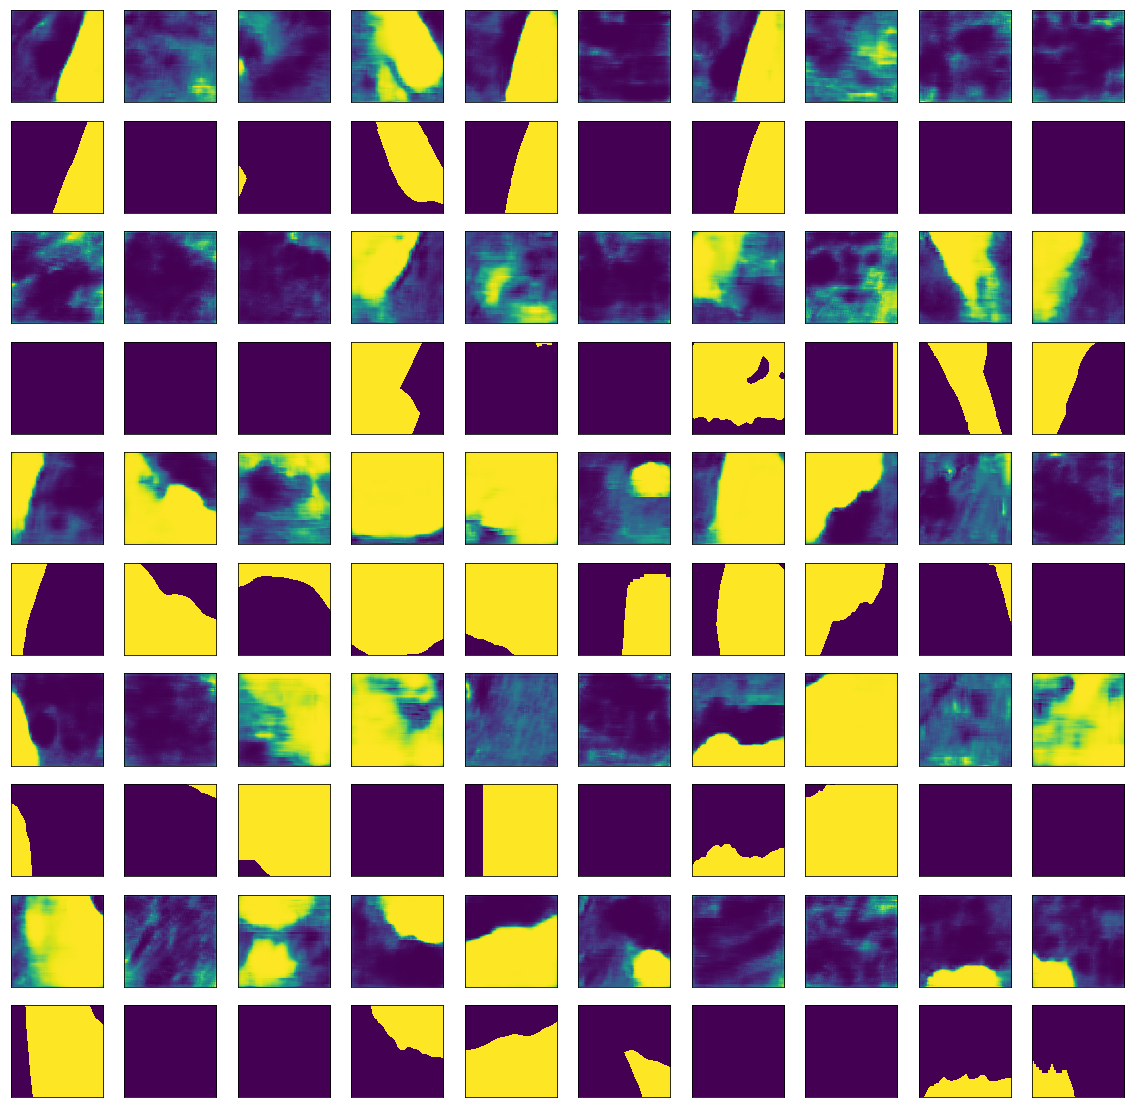

In [27]:
n = 10  # n*n plot
plt.figure(figsize=(20, 20))
for i in range(n//2):
    for j in range(n):
        ax = plt.subplot(n,n,2*i*n + j+1)
        plt.imshow(Pred[i*n+j,:,:,0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(n,n,2*i*n+n+j+1)
        plt.imshow(train_mask_96[i*n+j,:,:,0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
plt.show()

In [28]:
zeroone_pred = np.round(Pred)

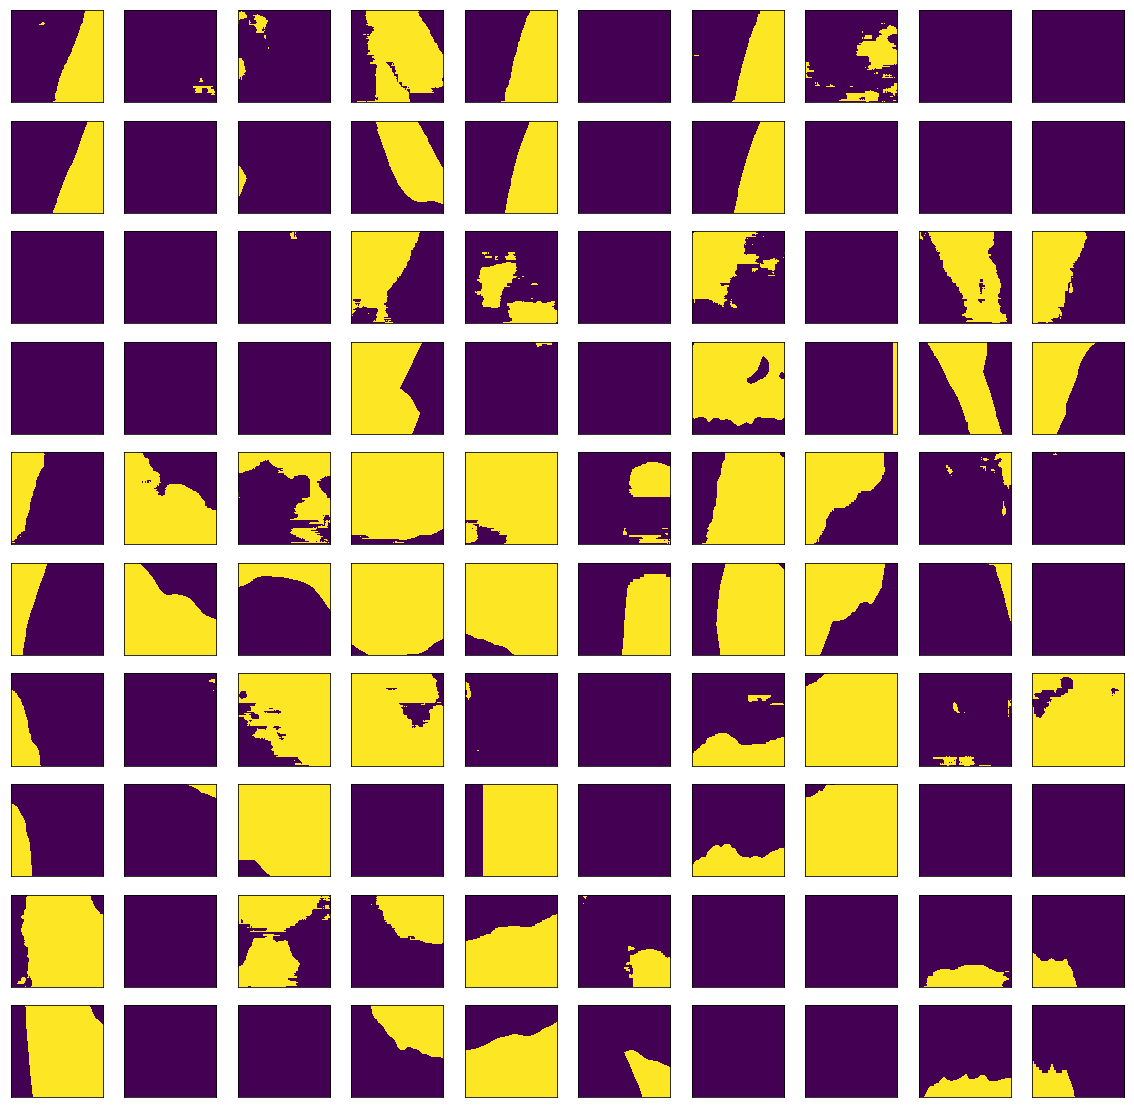

In [29]:
n = 10  # n*n plot
plt.figure(figsize=(20, 20))
for i in range(n//2):
    for j in range(n):
        ax = plt.subplot(n,n,2*i*n + j+1)
        plt.imshow(zeroone_pred[i*n+j,:,:,0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(n,n,2*i*n+n+j+1)
        plt.imshow(train_mask_96[i*n+j,:,:,0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
plt.show()